In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
import itertools
import pandas as pd
import math
from matplotlib import animation
import random
import scipy.special
from os import listdir
import os
from os.path import isfile, join
from operator import itemgetter
import operator

In [2]:
dir_path = '/home/samuel/Documents/PhD/Quasispecies/Data/'
index_name =  dir_path + 'seqs_index.dict'

index_dict = {}

with open(index_name, 'r') as f:
    for line in f:
        L = line.split('\t')
        index_dict[L[1][:-1]] = int(L[0])
        


WD = os.getcwd()
mypath = dir_path + 'Sequences_filtered/N_rem_rem/'

#Obtain the file names
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
data_dict = {}
data_dict[43] = {}
data_dict[30] = {}


#a = onlyfiles[0]
#Interpret file name, and extract step number from it

for a in onlyfiles:    
    if a[0] == 'c':
        step = int(a.split('-')[1][1:])
        t=43
        print(f'step={step} for t={t}')
    elif a[0] == '3':
        step = int(a.split('-')[2])
        t=30
        print(f'step={step} for t={t}')
    
    file_name = dir_path + 'Sequences_filtered/N_rem_rem/' + a
    seq_2_ab = {}
    with open(file_name, 'r') as r:
        for line in r:
            if line[0] == '>':
                abundance = int(line.split('-')[1][:-1])
                #print(abundance)
            else:
                sequence = line[:-1]
                hapl = index_dict[sequence]
                seq_2_ab[hapl]= abundance
    data_dict[t][step] = seq_2_ab
    
df = {}
#Upload data to DataFrame
df[43] = pd.DataFrame([])
df[30] = pd.DataFrame([])
df[43] = pd.DataFrame.from_dict(data_dict[43])
df[30] = pd.DataFrame.from_dict(data_dict[30])
df[43] = df[43].fillna(0)
df[30] = df[30].fillna(0)


step=60 for t=43
step=1 for t=43
step=22 for t=43
step=2 for t=30
step=12 for t=30
step=54 for t=43
step=18 for t=30
step=8 for t=30
step=46 for t=43
step=20 for t=43
step=42 for t=30
step=32 for t=30
step=34 for t=43
step=40 for t=30
step=38 for t=30
step=40 for t=43
step=26 for t=43
step=16 for t=43
step=25 for t=30
step=30 for t=30
step=20 for t=30
step=36 for t=43
step=60 for t=30
step=44 for t=30
step=28 for t=30
step=50 for t=43
step=48 for t=43
step=14 for t=43
step=22 for t=30
step=6 for t=30
step=52 for t=43
step=14 for t=30
step=44 for t=43
step=10 for t=43
step=46 for t=30
step=23 for t=43
step=23 for t=30
step=12 for t=43
step=38 for t=43
step=18 for t=43
step=50 for t=30
step=52 for t=30
step=16 for t=30
step=10 for t=30
step=34 for t=30
step=58 for t=43
step=30 for t=43
step=2 for t=43
step=4 for t=30
step=48 for t=30
step=6 for t=43
step=54 for t=30
step=8 for t=43
step=42 for t=43
step=32 for t=43
step=26 for t=30
step=58 for t=30
step=28 for t=43
step=36 for t=30
step=

In [8]:
seqs_list = {}
for ikey in index_dict.keys():
    seqs_list[index_dict[ikey]] = ikey
    
temps = [30,43]

In [4]:
codon_2_seq = {
    'UUU': 'F', 
    'UUC': 'F',
    'UUA': 'L',
    'UUG': 'L',
    'UCU': 'S', 
    'UCC': 'S',
    'UCA': 'S',
    'UCG': 'S',
    'UAU': 'Y', 
    'UAC': 'Y',
    'UAA': 'Stop',
    'UAG': 'Stop',
    'UGU': 'C', 
    'UGC': 'C',
    'UGA': 'Stop',
    'UGG': 'W',
    'CUU': 'L', 
    'CUC': 'L',
    'CUA': 'L',
    'CUG': 'L',
    'CCU': 'P', 
    'CCC': 'P',
    'CCA': 'P',
    'CCG': 'P',
    'CAU': 'H', 
    'CAC': 'H',
    'CAA': 'Q',
    'CAG': 'Q',
    'CGU': 'R', 
    'CGC': 'R',
    'CGA': 'R',
    'CGG': 'R',
    'AUU': 'I', 
    'AUC': 'I',
    'AUA': 'I',
    'AUG': 'M',
    'ACU': 'T', 
    'ACC': 'T',
    'ACA': 'T',
    'ACG': 'T',
    'AAU': 'N', 
    'AAC': 'N',
    'AAA': 'K',
    'AAG': 'K',
    'AGU': 'S', 
    'AGC': 'S',
    'AGA': 'R',
    'AGG': 'R',
    'GUU': 'V', 
    'GUC': 'V',
    'GUA': 'V',
    'GUG': 'V',
    'GCU': 'A', 
    'GCC': 'A',
    'GCA': 'A',
    'GCG': 'A',
    'GAU': 'D', 
    'GAC': 'D',
    'GAA': 'E',
    'GAG': 'E',
    'GGU': 'G', 
    'GGC': 'G',
    'GGA': 'G',
    'GGG': 'G'
}


my_top_aminos_5000 = {'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 61,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIF': 47,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRIKR': 42,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSICLLTQRVKR': 33,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFVLTQRVKR': 33,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLVTQRVKR': 32,
 'QQGQLYHNIGIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 31,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSILLLTQRVKR': 30,
 'QQGQLYHNIAIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 30,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIVLLTQRVKR': 29,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSICLLTQRIKR': 28,
 'QQGQLYHNIGIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRIKR': 26,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSILLLTQRIKR': 24,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSISLLTQRIKR': 20,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFVLTQRIKR': 19,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSISLLTQRVKR': 17,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSSFLLTQRVKR': 16,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIVLLTQRIKR': 14,
 'QHGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 11,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRRKR': 11,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTNNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 8,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDSFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 8,
 'QQGQLYHNIAIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRIKR': 8,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLVTQRIKR': 6,
 'QQGQLYHNIGIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSISLLTQRVKR': 5,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKRGNF': 4,
 'QQGQLYHTIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 4,
 'QQGQLYHNIDIVDGFDRRDFRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 3,
 'QQGQLYHNIGIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSICLLTQRIKR': 3,
 'QQGQLYHNIGIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSISLLTQRIKR': 3,
 'QPGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 2,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYNRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 2,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDRIFLLTQRVKR': 1,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFL': 1,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRGKR': 1,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTITGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 1,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSDLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 1,
 'QQGQLYHNIVIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 1,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIRGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRVKR': 1,
 'QPGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRIKR': 1,
 'QHGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDSIFLLTQRIKR': 1,
 'QQGQLYHNIDIVDGFDRRDIRLKSFTIKGERNGRPVNVSASLSAVDLFYSRLHTSNLPFATLDLDTTFSSFKHVLDRIFLLTQRIKR': 1}

In [5]:
def seq_2_amino(seq, initial=0):
    '''
    Function that given a sequence, return the aminoacid that it expresses.
    
    Input:
        -sequence of DNA or RNA 
        -initial position of reading (ORF) (Optional)
    Output:
        -list of aminoacids
    '''
    x = seq#[::-1]
    x = str(x[initial:]).upper()
    x = x.replace('T', 'U')
    x = list(x)
    aminos = []
    for i in range(len(x)//3):
        codon=''.join(x[3*i:3*i+3])
        codon = str(codon)
        try:
            amin = codon_2_seq[codon]
            #print(f'aminoacid={amin}')
            aminos.append(amin)
        except:
            print(f'codon {codon} not in dict')
    aminos = ''.join(aminos)
    aminos = aminos.split('Stop')
    return aminos

def compare_proteins(amin_1, amin_2):
    '''
    Function that compares two aminoacid and returns the differences.
    Input:
        -amin_1 & amin_2, aminoacids to compare
    Output:
        -dict having position: nucl_amin_1, nucl_amin_2
    '''
    results = {}
    
    if len(amin_1) != len(amin_2):
        #print('Aminoacids of different length!')
        return None
    else:
        for i in range(len(amin_1)):
            if amin_1[i] != amin_2[i]:
                results[i] = [amin_2[i], amin_1[i]]
    return results

In [172]:
#find top 10 most abundant aminoacids in every step
top_aminos = []



for t in temps:
    df_t = df[t]
    L = list(df_t.columns)
    L.sort()
    
    for step in L:
        amino_dict = {}
        amino_mapping = {}      #contains amino: [seqs]
        seqs = list(df_t[step].index)
        seqs = [seqs_list[s] for s in seqs]

        for sequence in seqs:
            amino = seq_2_amino(sequence)[0]

            if amino not in list(amino_dict.keys()):
                amino_dict[amino] = df_t[step].loc[index_dict[sequence]]
                amino_mapping[amino] = [sequence]
            else:
                amino_dict[amino] +=  df_t[step].loc[index_dict[sequence]]
                if sequence not in amino_mapping[amino]:
                    amino_mapping[amino].append(sequence)
        k_sort = sorted(amino_dict.items(), key=itemgetter(1), reverse=True)
        for i in range(10):
            top_aminos.append(k_sort[i][0])
        
            


top_aminos2 = list(set(top_aminos))

aminos_top_count = {i:top_aminos.count(i) for i in top_aminos}

aminos_top_count = dict( sorted(aminos_top_count.items(), key=operator.itemgetter(1),reverse=True))
#t,step = 43, 58

my_top_aminos = aminos_top_count

In [6]:
def t_step_toarx(t,step):
    '''
        Function that given a temperature and step,
        returns the correct archive name
    '''
    
    if t==30:
        if step<10:
            return f'30-1-0{step}-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed'
        else:
            return f'30-1-{step}-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed'
    elif t==43:
        if step<10:
            return f'c43-p0{step}-3-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed'
        else:
            return f'c43-p{step}-3-EL3_all_all_trim_merged_filter_sort_filter_length_collapsed'
    else:
        return None

In [14]:
my_top_aminos = my_top_aminos_5000
amino_ab_evolution = {t:{am: [] for am in list(my_top_aminos.keys())[:30]} for t in temps}

for t in temps:
    
    df_t = df[t]
    L = list(df_t.columns)
    L.sort()
    
    for step in L:
        print(t,step)
        amino_dict = {}         #contains amino: abundance
        amino_mapping = {}      #contains amino: [seqs]
        seqs = list(df_t[step].index)
        seqs = [seqs_list[s] for s in seqs][:1000]
        print('Looking for aminoacids')
        for sequence in seqs:
            amino = seq_2_amino(sequence)[0]

            if amino not in list(amino_dict.keys()):
                amino_dict[amino] = df_t[step].loc[index_dict[sequence]]
                amino_mapping[amino] = [sequence]
            else:
                amino_dict[amino] +=  df_t[step].loc[index_dict[sequence]]
                if sequence not in amino_mapping[amino]:
                    amino_mapping[amino].append(sequence)
        print('Saving mapping and aminoacid abundance')
        output_file = '/home/samuel/Documents/PhD/Quasispecies/Data/Sequences_filtered/aminoacids/'
        output_file1 = output_file+t_step_toarx(t,step)
        output_file2 = output_file+'mapping_'+ t_step_toarx(t,step)
        
        with open(output_file1, 'w') as f:    #write the abundances of aminoacids
            for i,k in enumerate(amino_dict.keys()):
                ab = int(amino_dict[k])
                f.write(f'>{i}-{ab}\n')
                f.write(k+'\n')
        
        with open(output_file2, 'w') as f:    #write the abundances of aminoacids
            for i,k in enumerate(amino_mapping.keys()):
                rna_list = [index_dict[s] for s in amino_mapping[k]]
                f.write(f'{k}:{rna_list}\n')
        print('Compunting amino avolution histogram')
        #normalize amino_dict
        normalization = 0
        for amino in amino_dict.keys():
            normalization += amino_dict[amino]
        for amino in amino_dict.keys():
            amino_dict[amino] = amino_dict[amino] / normalization
        
        
        for aminoacid in amino_ab_evolution[t].keys():
            if aminoacid in amino_dict.keys():
                amino_ab_evolution[t][aminoacid].append(amino_dict[aminoacid])
            else:
                amino_ab_evolution[t][aminoacid].append(0)


30 2
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 4
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 6
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 8
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 10
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 12
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 14
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 16
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 18
Looking for aminoacids
Saving mapping and aminoacid abundance
Compunting amino avolution histogram
30 20
Looking for aminoacids
Saving mapping and aminoacid a

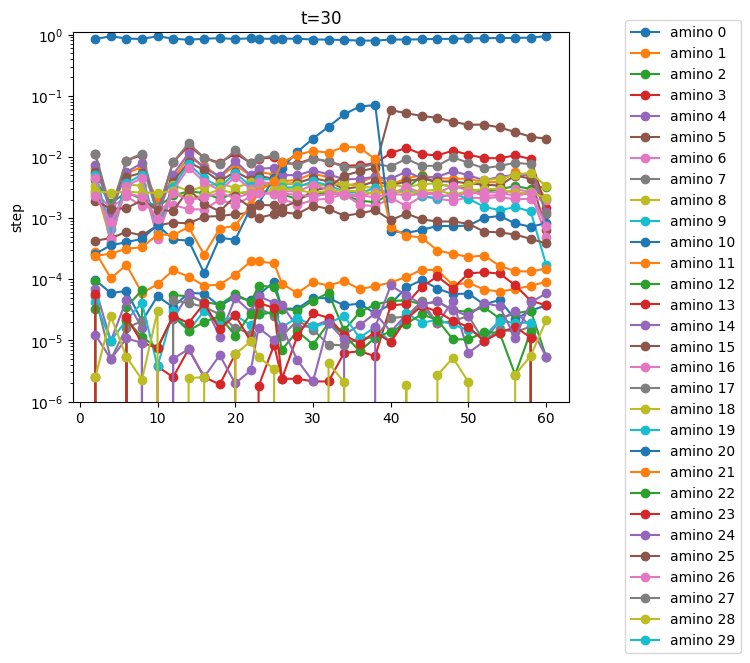

In [16]:
for t in [30]:
    df_t = df[t]
    L = list(df_t.columns)
    L.sort()
    x = L
    
    for i_am,amino in enumerate(amino_ab_evolution[t].keys()):
        y = amino_ab_evolution[t][amino]
        plt.plot(x,y, 'o-', label=f'amino {i_am}')

    plt.title(f't={t}')       
plt.yscale('log')
plt.ylabel('relative abundance')
plt.ylabel('step')
plt.ylim(10**-6, 1.1)
plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.1, 1.05))
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig(f'./amino_ab_evolution_{t}.svg', dpi=300, format='svg')

In [54]:
np.log10(np.array(amino_ab_evolution[30][list(amino_ab_evolution[30].keys())[1]]))

array([-2.18008124, -2.78090599, -2.26586597, -2.1661921 , -2.71354458,
       -2.35504755, -2.00790094, -2.14359098, -2.33213096, -2.13488867,
       -2.30658371, -2.24123472, -2.28998744, -2.3999538 , -2.37336487,
       -2.27165391, -2.33319077, -2.47890058, -2.42455671, -2.31213222,
       -2.45575233, -2.3491463 , -2.30228629, -2.3498116 , -2.35519496,
       -2.35623164, -2.41446538, -2.41090765, -2.24706222, -2.31200131,
       -2.69356877])

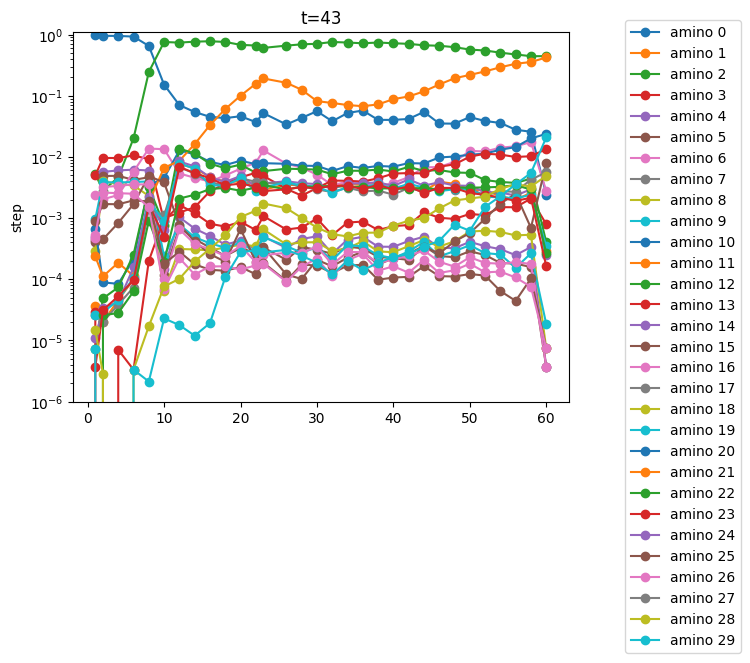

In [44]:
for t in [43]:
    df_t = df[t]
    L = list(df_t.columns)
    L.sort()
    x = L
    
    for i_am,amino in enumerate(amino_ab_evolution[t].keys()):
        y = amino_ab_evolution[t][amino]
        plt.plot(x,y, 'o-', label=f'amino {i_am}')

    plt.title(f't={t}')       
plt.yscale('log')
plt.ylabel('relative abundance')
plt.ylabel('step')
plt.ylim(10**-6, 1.1)
plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.1, 1.05))
#plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.savefig(f'./amino_ab_evolution_{t}.svg', dpi=300, format='svg')

In [18]:
abundances = list(amino_dict.values())

abundances.sort(reverse=True)

In [27]:
abundances_dict

NameError: name 'abundances_dict' is not defined

Text(0.5, 0, 'rank')

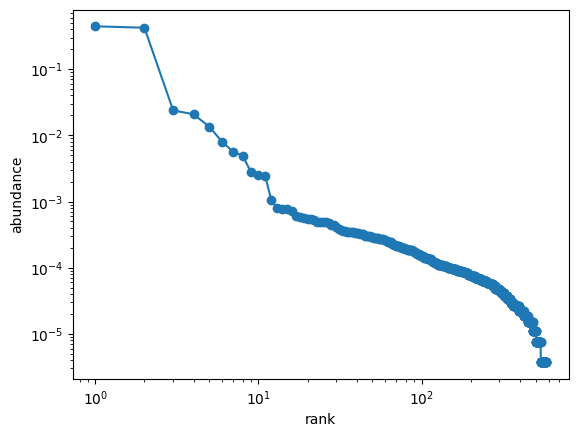

In [55]:
plt.plot([i+1 for i in range(len(abundances))], abundances, 'o-')

'''
x = np.linspace(1, 10**4, 100)
y = np.power(x,-1.42)*np.array(abundances[1:]).sum()
plt.plot(x,y)

x = np.linspace(1, 10**4, 100)
y = np.power(x,-1.0)*np.array(abundances[30:100]).sum()
plt.plot(x,y)
'''
plt.yscale('log')
plt.xscale('log')
plt.ylabel('abundance')
plt.xlabel('rank')

In [23]:
sub_spaces = list(amino_mapping.values())

sizes = [len(ss) for ss in sub_spaces]
sizes.sort(reverse=True)

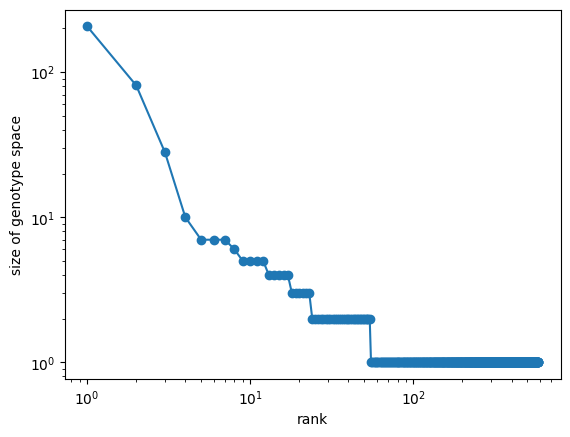

In [24]:
plt.plot([i+1 for i in range(len(sizes))], sizes, 'o-')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('rank')
plt.ylabel('size of genotype space')

x = np.linspace(1, 10**4, 100)
y = np.power(x,-1.0)*np.array(sizes[0:]).sum()
#plt.plot(x,y)